In [1]:
import polars as pl
from polars import col

In [4]:
vuelos_lz = (
    pl.scan_parquet('/content/vuelos.parquet')
)
def fill_null_int_str(data, col_name):

    if str(data.select(col_name).dtypes[0]) == 'String':  ## columna tipo string
           return data.fill_null('LOST')  ## rellena con lost
    else:
           return data.fill_null(-999) ### rellenar con -999 como se comporta pipe

In [5]:
vuelos_lz.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [6]:
vuelos_lz.select(
    pl.col('AIR_TIME'),## tiempo en el aire
    pl.col('DEPARTURE_DELAY')  ## retrasos en las salidas
).map_batches(lambda c: (c/60).cast(pl.Int32)).collect() ## aplica una funcion personalizada a un  dataframe de polars
### funcion lambda columna y divida por 60, aplico .castee el tipo de dato polars int32, y .collect y obsevamos

AIR_TIME,DEPARTURE_DELAY
i32,i32
2,0
4,0
4,0
4,0
3,0
…,…
4,0
3,0
3,0


In [7]:
vuelos_lz.columns

<ipython-input-7-6d0a724ff71f>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  vuelos_lz.columns


['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

### Nombre de la funcion que se creo luego los parametros de la funcion, luego nombre de columna.collect()

In [8]:
vuelos_lz.pipe(fill_null_int_str,'WEATHER_DELAY').collect() # Changed 'WHEATER_DELAY' to 'WEATHER_DELAY'  ## pipe -primer parametro secuencia de funciones del usuario

<ipython-input-4-3dd8b8055780>:6: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  if str(data.select(col_name).dtypes[0]) == 'String':  ## columna tipo string


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,-999,-999,-999,-999,-999
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,-999,-999,-999,-999,-999


In [9]:
vuelos_lz.pipe(fill_null_int_str,'CANCELLATION_REASON').collect() ## APLICAMOS funcion pipe y es str Lost

<ipython-input-4-3dd8b8055780>:6: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  if str(data.select(col_name).dtypes[0]) == 'String':  ## columna tipo string


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""LOST""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,"""LOST""",null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,"""LOST""",null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,"""LOST""",null,null,null,null,null


## APLICAMOS PIPE CON CUALQUIER FUNCION QUE QUERRAMOS APLICAR

In [10]:
vuelos_lz.pipe(fill_null_int_str,'WEATHER_DELAY').collect() ## APLICAMOS funcion pipe y es NUMERICA -999

<ipython-input-4-3dd8b8055780>:6: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  if str(data.select(col_name).dtypes[0]) == 'String':  ## columna tipo string


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,-999,-999,-999,-999,-999
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,-999,-999,-999,-999,-999


In [11]:
query_pf = vuelos_lz.group_by('AIR_TIME').agg(
    SUM_AIR_TIME = pl.col('AIR_TIME').sum()  ## suma del tiempo en el aire
    ).sort('SUM_AIR_TIME', descending=True)



### LA funcion profile es el perfilamiento del lazy Frame, ejecutar la consulta devuelve una tupla un dataframe con informacion del perfil e informacion de cada nodo , las undiades de tiempo es en microsegundos

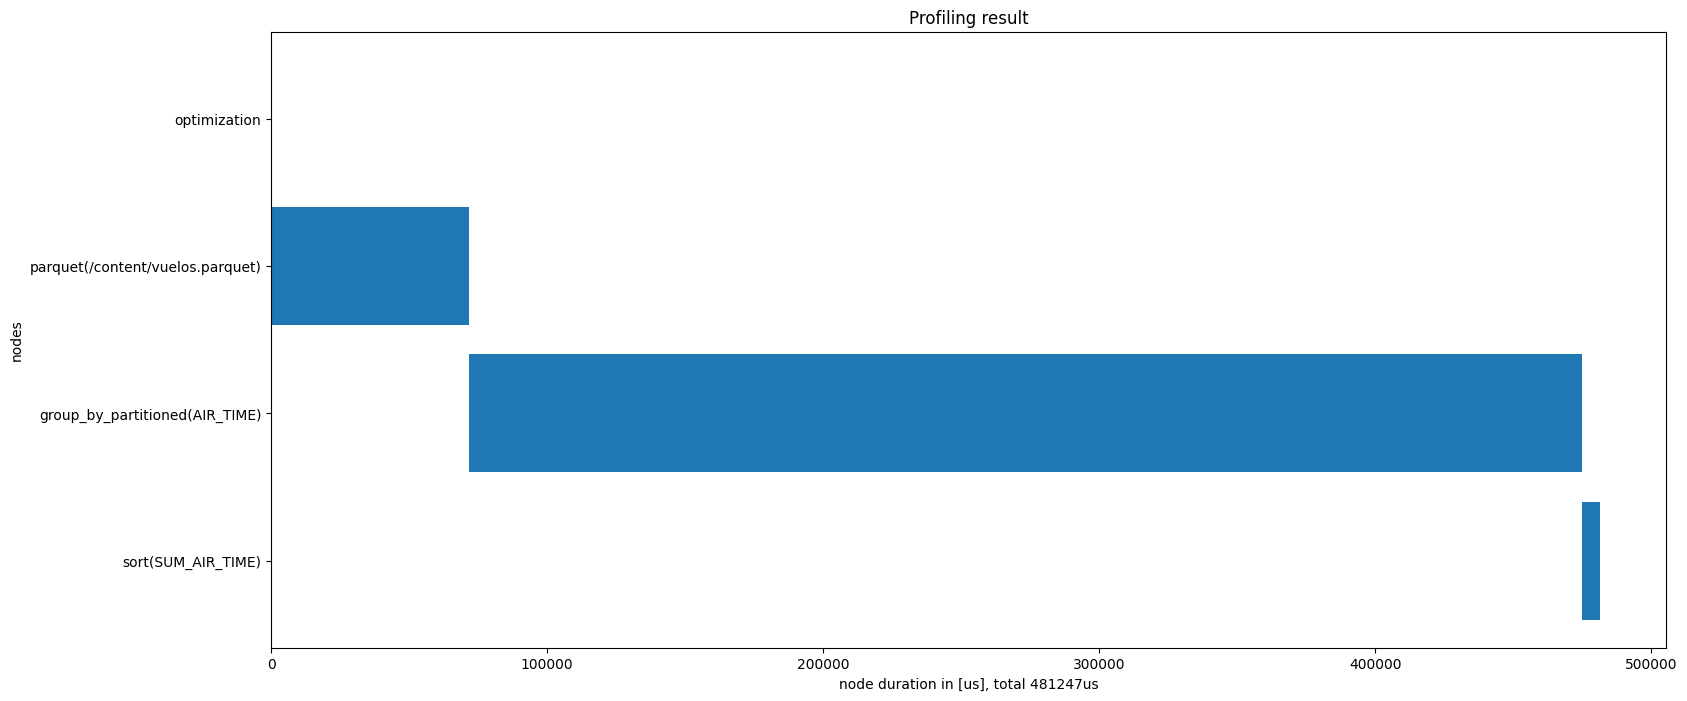

(shape: (676, 2)
 ┌──────────┬──────────────┐
 │ AIR_TIME ┆ SUM_AIR_TIME │
 │ ---      ┆ ---          │
 │ i32      ┆ i32          │
 ╞══════════╪══════════════╡
 │ 129      ┆ 3769251      │
 │ 130      ┆ 3727620      │
 │ 127      ┆ 3726688      │
 │ 126      ┆ 3704148      │
 │ 133      ┆ 3688755      │
 │ …        ┆ …            │
 │ 672      ┆ 672          │
 │ 669      ┆ 669          │
 │ 8        ┆ 544          │
 │ 7        ┆ 49           │
 │ null     ┆ 0            │
 └──────────┴──────────────┘,
 shape: (4, 3)
 ┌─────────────────────────────────┬────────┬────────┐
 │ node                            ┆ start  ┆ end    │
 │ ---                             ┆ ---    ┆ ---    │
 │ str                             ┆ u64    ┆ u64    │
 ╞═════════════════════════════════╪════════╪════════╡
 │ optimization                    ┆ 0      ┆ 14     │
 │ parquet(/content/vuelos.parque… ┆ 14     ┆ 71641  │
 │ group_by_partitioned(AIR_TIME)  ┆ 71713  ┆ 474714 │
 │ sort(SUM_AIR_TIME)             

In [12]:
query_pf.profile(show_plot=True)  ## mostrar un diagrama de gantt del resultado del perfilado que vamos a tener, cuanto tiempo a tomado y la duracion en microsegundos

## Podemos guardar el archivo de serializacion de la consulta

In [13]:
query_pf.serialize('./output.txt')  ## las funciones serialize permiten serializar el lazy frame

## a continuacion deserializamos y utilizamos la consulta y no compartirlo en polars

In [14]:
import io

with open('output.txt','rb') as file_object:
      data = file_object.read()  ## lea el file anterior
query = io.BytesIO(data) ## construir la query a partir de a consulta

pl.LazyFrame.deserialize(query).collect() # Changed 'desearialize' to 'deserialize'

AIR_TIME,SUM_AIR_TIME
i32,i32
129,3769251
130,3727620
127,3726688
126,3704148
133,3688755
…,…
672,672
669,669
8,544
